Get pair-wise correlations between all deeply sequenced condensability scores in 1kb resolution (mouse data)

In [1]:
# python modules
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats


In [2]:
# custom modules
import graphics_edit as graphics

In [3]:
# matplotlib setting
%matplotlib inline
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

In [4]:
# custom modules
import load_file_edit as load_file

In [5]:
path = "./data/"

In [6]:
### parameters
cell_org = {'H1':'human',
            'GM':'human',
            'mCD8T:WT':'mouse',
            'mCD8T:DFMO':'mouse',
            'mCD8T:ODCKO':'mouse'}

cell_chrnames = {'H1':['chr%s' % (i) for i in range(1, 23)] + ['chrX', 'chrY'],
                 'GM':['chr%s' % (i) for i in range(1, 23)] + ['chrX'],
                 'mCD8T:WT':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:DFMO':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:ODCKO':['chr%s' % (i) for i in range(1, 20)] + ['chrX']}

In [7]:
### exp list
### exp = (rep, cell, sample, agent, tnum)
exp_list = [(1, 'mCD8T:WT', 'NCP', 'sp', 8),
            (2, 'mCD8T:WT', 'NCP', 'sp', 8),
            (1, 'mCD8T:DFMO', 'NCP', 'sp', 8),
            (2, 'mCD8T:DFMO', 'NCP', 'sp', 8),
            (1, 'mCD8T:ODCKO', 'NCP', 'sp', 8),
            (2, 'mCD8T:ODCKO', 'NCP', 'sp', 8)]

depth = 'deep'
bin_size = 1000
dtype = 'score'


In [8]:
### read data
exp_ID_score = {}
for exp in exp_list:
    rep, cell, sample, agent, tnum = exp
    
    fname = '_'.join(['GSE252941',
                      cell,
                      sample,
                      agent,
                      str(rep) + 'rep',
                      depth,
                      str(int(bin_size/1000.0)) + 'kb',
                      dtype]) + '.cn'

    field_name = '_'.join([cell,
                           sample,
                           agent,
                           str(tnum),
                           str(rep) + 'rep',
                           depth])

    chr_choices = cell_chrnames[cell]
        
    ID_score = load_file.read_cn_file(path + fname,
                                      mode='col',
                                      field_choices=[field_name],
                                      chr_choices=chr_choices)[field_name]
    exp_ID_score[exp] = ID_score


In [9]:
### get common IDs
ID_list = set([])
for i in range(len(exp_list)):
    exp = exp_list[i]
    if i == 0:
        ID_list |= set(exp_ID_score[exp].keys())
        continue
    ID_list &= set(exp_ID_score[exp].keys())
ID_list = sorted(list(ID_list))
print len(ID_list)
    

2633787


In [10]:
# compute residual sum of squares
def get_residual (Y, Ypred):
    assert len(Y) == len(Ypred)
    residual = 0.0
    for i in range(len(Y)):
        residual += (Y[i] - Ypred[i])**2
    return residual

# compute mean squared error
def get_mse (Y, Ypred):
    residual = get_residual(Y, Ypred)
    return residual/len(Y)

# compute r-squared when X=Y
def get_rsq (Y, Ypred):
    residual = get_residual(Y, Ypred)
    Ymean = [np.mean(Y)]*len(Y)
    squares = get_residual(Y, Ymean)
    rsq = 1.0 - float(residual)/squares
    return rsq

# compute mean absolute error
def get_mae (Y, Ypred):
    assert len(Y) == len(Ypred)
    error = 0.0
    for i in range(len(Y)):
        error += abs(Y[i]-Ypred[i])
    return error/len(Y)

1-mCD8T:WT-NCP-sp-8
2-mCD8T:WT-NCP-sp-8
Spearman 0.56
Mean squared error 0.08
Mean absolute error 0.22
R-squared 0.52


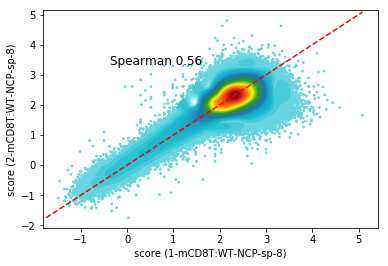



1-mCD8T:WT-NCP-sp-8
1-mCD8T:DFMO-NCP-sp-8
Spearman 0.67
Mean squared error 0.15
Mean absolute error 0.31
R-squared 0.58


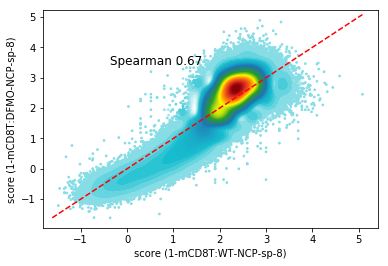



1-mCD8T:WT-NCP-sp-8
2-mCD8T:DFMO-NCP-sp-8
Spearman 0.66
Mean squared error 0.14
Mean absolute error 0.29
R-squared 0.61


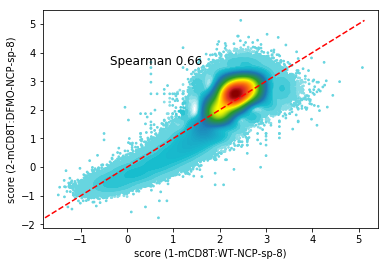



1-mCD8T:WT-NCP-sp-8
1-mCD8T:ODCKO-NCP-sp-8
Spearman 0.64
Mean squared error 0.15
Mean absolute error 0.31
R-squared 0.55


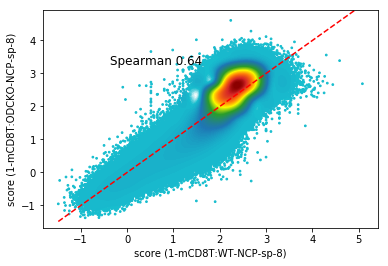



1-mCD8T:WT-NCP-sp-8
2-mCD8T:ODCKO-NCP-sp-8
Spearman 0.66
Mean squared error 0.17
Mean absolute error 0.33
R-squared 0.55


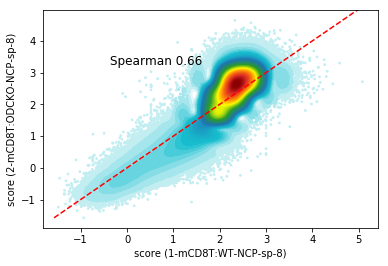



2-mCD8T:WT-NCP-sp-8
1-mCD8T:DFMO-NCP-sp-8
Spearman 0.64
Mean squared error 0.18
Mean absolute error 0.34
R-squared 0.52


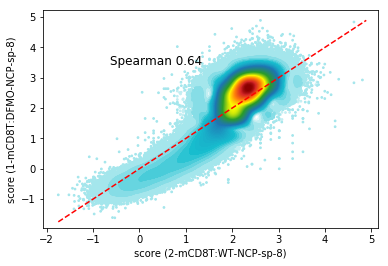



2-mCD8T:WT-NCP-sp-8
2-mCD8T:DFMO-NCP-sp-8
Spearman 0.61
Mean squared error 0.16
Mean absolute error 0.32
R-squared 0.53


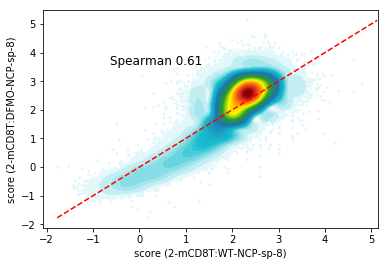



2-mCD8T:WT-NCP-sp-8
1-mCD8T:ODCKO-NCP-sp-8
Spearman 0.56
Mean squared error 0.19
Mean absolute error 0.35
R-squared 0.44


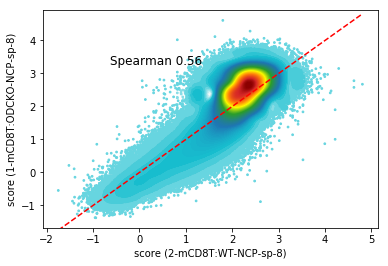



2-mCD8T:WT-NCP-sp-8
2-mCD8T:ODCKO-NCP-sp-8
Spearman 0.56
Mean squared error 0.21
Mean absolute error 0.37
R-squared 0.44


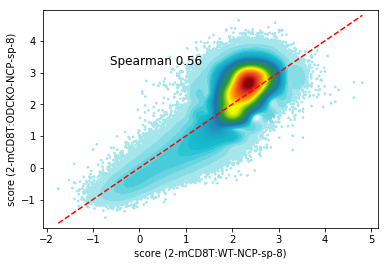



1-mCD8T:DFMO-NCP-sp-8
2-mCD8T:DFMO-NCP-sp-8
Spearman 0.76
Mean squared error 0.08
Mean absolute error 0.22
R-squared 0.78


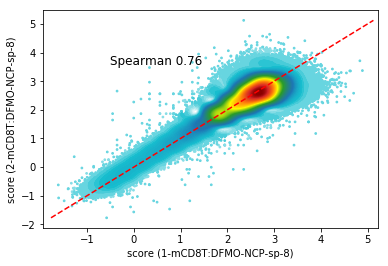



1-mCD8T:DFMO-NCP-sp-8
1-mCD8T:ODCKO-NCP-sp-8
Spearman 0.72
Mean squared error 0.11
Mean absolute error 0.26
R-squared 0.67


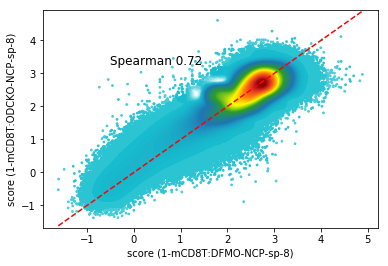



1-mCD8T:DFMO-NCP-sp-8
2-mCD8T:ODCKO-NCP-sp-8
Spearman 0.72
Mean squared error 0.12
Mean absolute error 0.27
R-squared 0.68


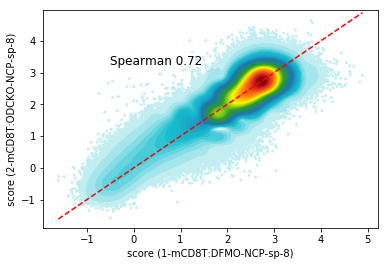



2-mCD8T:DFMO-NCP-sp-8
1-mCD8T:ODCKO-NCP-sp-8
Spearman 0.73
Mean squared error 0.10
Mean absolute error 0.25
R-squared 0.70


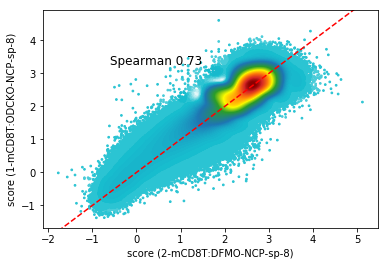



2-mCD8T:DFMO-NCP-sp-8
2-mCD8T:ODCKO-NCP-sp-8
Spearman 0.74
Mean squared error 0.11
Mean absolute error 0.26
R-squared 0.72


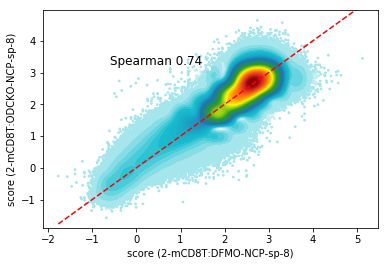



1-mCD8T:ODCKO-NCP-sp-8
2-mCD8T:ODCKO-NCP-sp-8
Spearman 0.78
Mean squared error 0.09
Mean absolute error 0.23
R-squared 0.76


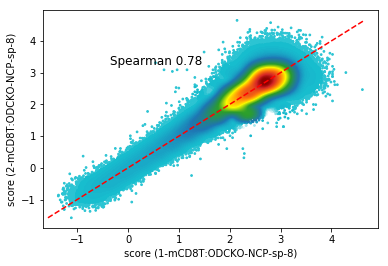

In [11]:
### get correlation between experiments
pair_corr = {}
pair_mse = {}
for i in range(len(exp_list)-1):
    for j in range(i+1, len(exp_list)):
        exp1 = exp_list[i]
        exp2 = exp_list[j]

        X, Y = [], []
        for ID in ID_list:
            X.append(exp_ID_score[exp1][ID])
            Y.append(exp_ID_score[exp2][ID])

        corr = scipy.stats.spearmanr(X, Y)[0]
        mse = get_mse(Y, X)
        rsq = get_rsq(Y, X)
        mae = get_mae(Y, X)
        #corr = scipy.stats.pearsonr(X, Y)[0]
        print "%d-%s-%s-%s-%d" % exp1
        print "%d-%s-%s-%s-%d" % exp2
        print "Spearman %1.2f" % (corr)
        print "Mean squared error %1.2f" % (mse)
        print "Mean absolute error %1.2f" % (mae)
        print "R-squared %1.2f" % (rsq)
        #print ("%s VS %s: %1.2f" % (agent1, agent2, corr))
            
        fig = plt.figure()
        #plt.plot(X, Y, 'k,', alpha=0.25)
        graphics.density_scatter (X, Y, bins=20, ax=plt.gca())
        plt.plot([min(X+Y), max(X+Y)], [min(X+Y), max(X+Y)], 'r--')
        plt.annotate("Spearman %1.2f" % (corr),
                     xy=(0.2, 0.75),
                     fontsize=12,
                     xycoords='axes fraction')
        plt.xlabel("score (%d-%s-%s-%s-%d)" % exp1)
        plt.ylabel("score (%d-%s-%s-%s-%d)" % exp2)
        plt.show()
        plt.close()

        pair_corr[(exp1, exp2)] = corr
        pair_mse[(exp1, exp2)] = mse
        print
        print


In [12]:
### reorganize data and make labels
exp_label = {}
exp_data = {}
for exp in exp_list:
    rep, cell, sample, agent, tnum = exp
    label = '%s\n%s %s id:%d\n%d-rep' % (cell, sample, agent, tnum, rep)
    exp_label[exp] = label
    data = [exp_ID_score[exp][ID] for ID in ID_list]
    exp_data[exp] = data
    


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/image.py:413: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/image.py:418: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/colors.py:919: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Library/Frameworks/Python.framew

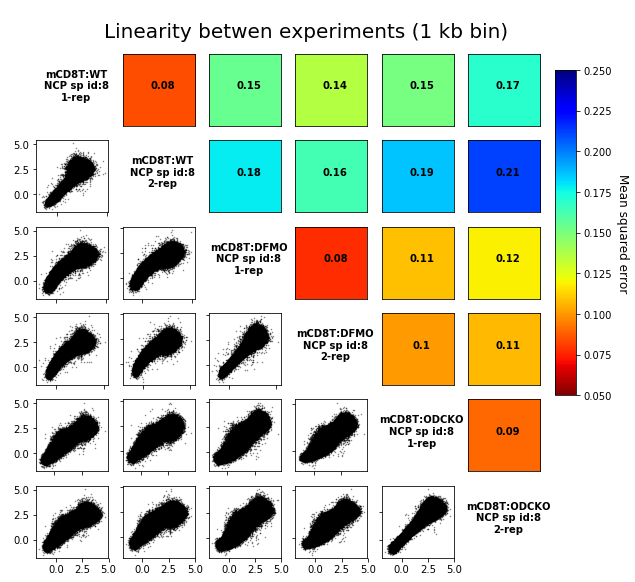

In [13]:
# plot correlation matrix between experiment
graphics.plot_corr_matrix(exp_data,
                          exp_label,
                          ids = exp_list,
                          pair_corr = pair_mse,
                          scatter_style='density',
                          bins=30,
                          cbar=True,
                          cmap='jet_r',
                          vmin=0.05,y
                          vmax=0.25,
                          save=True,
                          title="Linearity betwen experiments (1 kb bin)",
                          cbar_label="Mean squared error", 
                          note='1kb')
 